In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
plt.rcParams['figure.dpi'] = 300

In [56]:
group_df = pd.DataFrame.from_records([['Racialized', 'rac'],
 ['Black', 'bl'],
[ 'Recent\nImmigrants', 'imm'],
 ['Low\nIncome', 'lico'],
[ 'Carless\nHouseholds', 'c0'],
[ 'LEP', 'lep'],
[ 'General\nPopulation', 'raw']], columns = ['Group String', 'group'])

In [57]:
df = pd.read_csv('RGE_sum_no-outliers.csv').merge(group_df)
df

,date,period,type,ttt,ge_raw,ttt_base,ge_base,rel_ge,additional_tt,group,Group String
0,2019-11-14,AM,bl_am,1033593.69665,0.02092,1033593.69665,0.02092,100.00000,0.00000,bl,Black
1,2019-11-28,AM,bl_am,1124960.57992,0.01968,1033593.69665,0.02092,94.04305,91366.88327,bl,Black
2,2019-11-29,AM,bl_am,1112674.39247,0.01979,1033593.69665,0.02092,94.57396,79080.69583,bl,Black
3,2019-12-02,AM,bl_am,1319086.55250,0.01771,1033593.69665,0.02092,84.64756,285492.85586,bl,Black
4,2019-12-03,AM,bl_am,1160114.02935,0.01918,1033593.69665,0.02092,91.65558,126520.33270,bl,Black
...,...,...,...,...,...,...,...,...,...,...,...
744,2019-12-23,PM,raw_pm,11834011.33333,0.02028,10610566.50000,0.02254,89.98689,1223444.83333,raw,General\nPopulation
745,2019-12-27,PM,raw_pm,10753369.00000,0.02220,10610566.50000,0.02254,98.49239,142802.50000,raw,General\nPopulation
746,2019-12-30,PM,raw_pm,10950544.66667,0.02183,10610566.50000,0.02254,96.86424,339978.16667,raw,General\nPopulation
747,2020-01-02,PM,raw_pm,10933646.33333,0.02184,10610566.50000,0.02254,96.92878,323079.83333,raw,General\nPopulation


In [109]:
df[(df['period'] == 'AM') & (df['date'] == '2019-12-02')]

,date,period,type,ttt,ge_raw,ttt_base,ge_base,rel_ge,additional_tt,group,Group String
3,2019-12-02,AM,bl_am,1319086.55250,0.01771,1033593.69665,0.02092,84.64756,285492.85586,bl,Black
110,2019-12-02,AM,c0_am,3871540.50000,0.02001,3043916.66667,0.02367,84.56416,827623.83333,c0,Carless\nHouseholds
217,2019-12-02,AM,imm_am,1113723.31618,0.01731,829676.65864,0.02136,81.04446,284046.65755,imm,Recent\nImmigrants
324,2019-12-02,AM,lep_am,719179.10764,0.01699,544725.07584,0.02066,82.23281,174454.03180,lep,LEP
431,2019-12-02,AM,lico_am,4112523.33333,0.01874,3230942.83333,0.02197,85.30330,881580.50000,lico,Low\nIncome
538,2019-12-02,AM,rac_am,7799910.43524,0.01715,5883869.19042,0.02091,82.05035,1916041.24483,rac,Racialized
645,2019-12-02,AM,raw_am,15015161.33333,0.01753,11328861.33333,0.02145,81.73160,3686300.00000,raw,General\nPopulation


In [110]:
df[(df['period'] == 'AM') & (df['date'] == '2019-11-14')]

,date,period,type,ttt,ge_raw,ttt_base,ge_base,rel_ge,additional_tt,group,Group String
0,2019-11-14,AM,bl_am,1033593.69665,0.02092,1033593.69665,0.02092,100.00000,0.00000,bl,Black
107,2019-11-14,AM,c0_am,3043916.66667,0.02367,3043916.66667,0.02367,100.00000,0.00000,c0,Carless\nHouseholds
214,2019-11-14,AM,imm_am,829676.65864,0.02136,829676.65864,0.02136,100.00000,0.00000,imm,Recent\nImmigrants
321,2019-11-14,AM,lep_am,544725.07584,0.02066,544725.07584,0.02066,100.00000,0.00000,lep,LEP
428,2019-11-14,AM,lico_am,3230942.83333,0.02197,3230942.83333,0.02197,100.00000,0.00000,lico,Low\nIncome
535,2019-11-14,AM,rac_am,5883869.19042,0.02091,5883869.19042,0.02091,100.00000,0.00000,rac,Racialized
642,2019-11-14,AM,raw_am,11328861.33333,0.02145,11328861.33333,0.02145,100.00000,0.00000,raw,General\nPopulation


In [111]:
df = df[df['date'] != '2019-11-14']

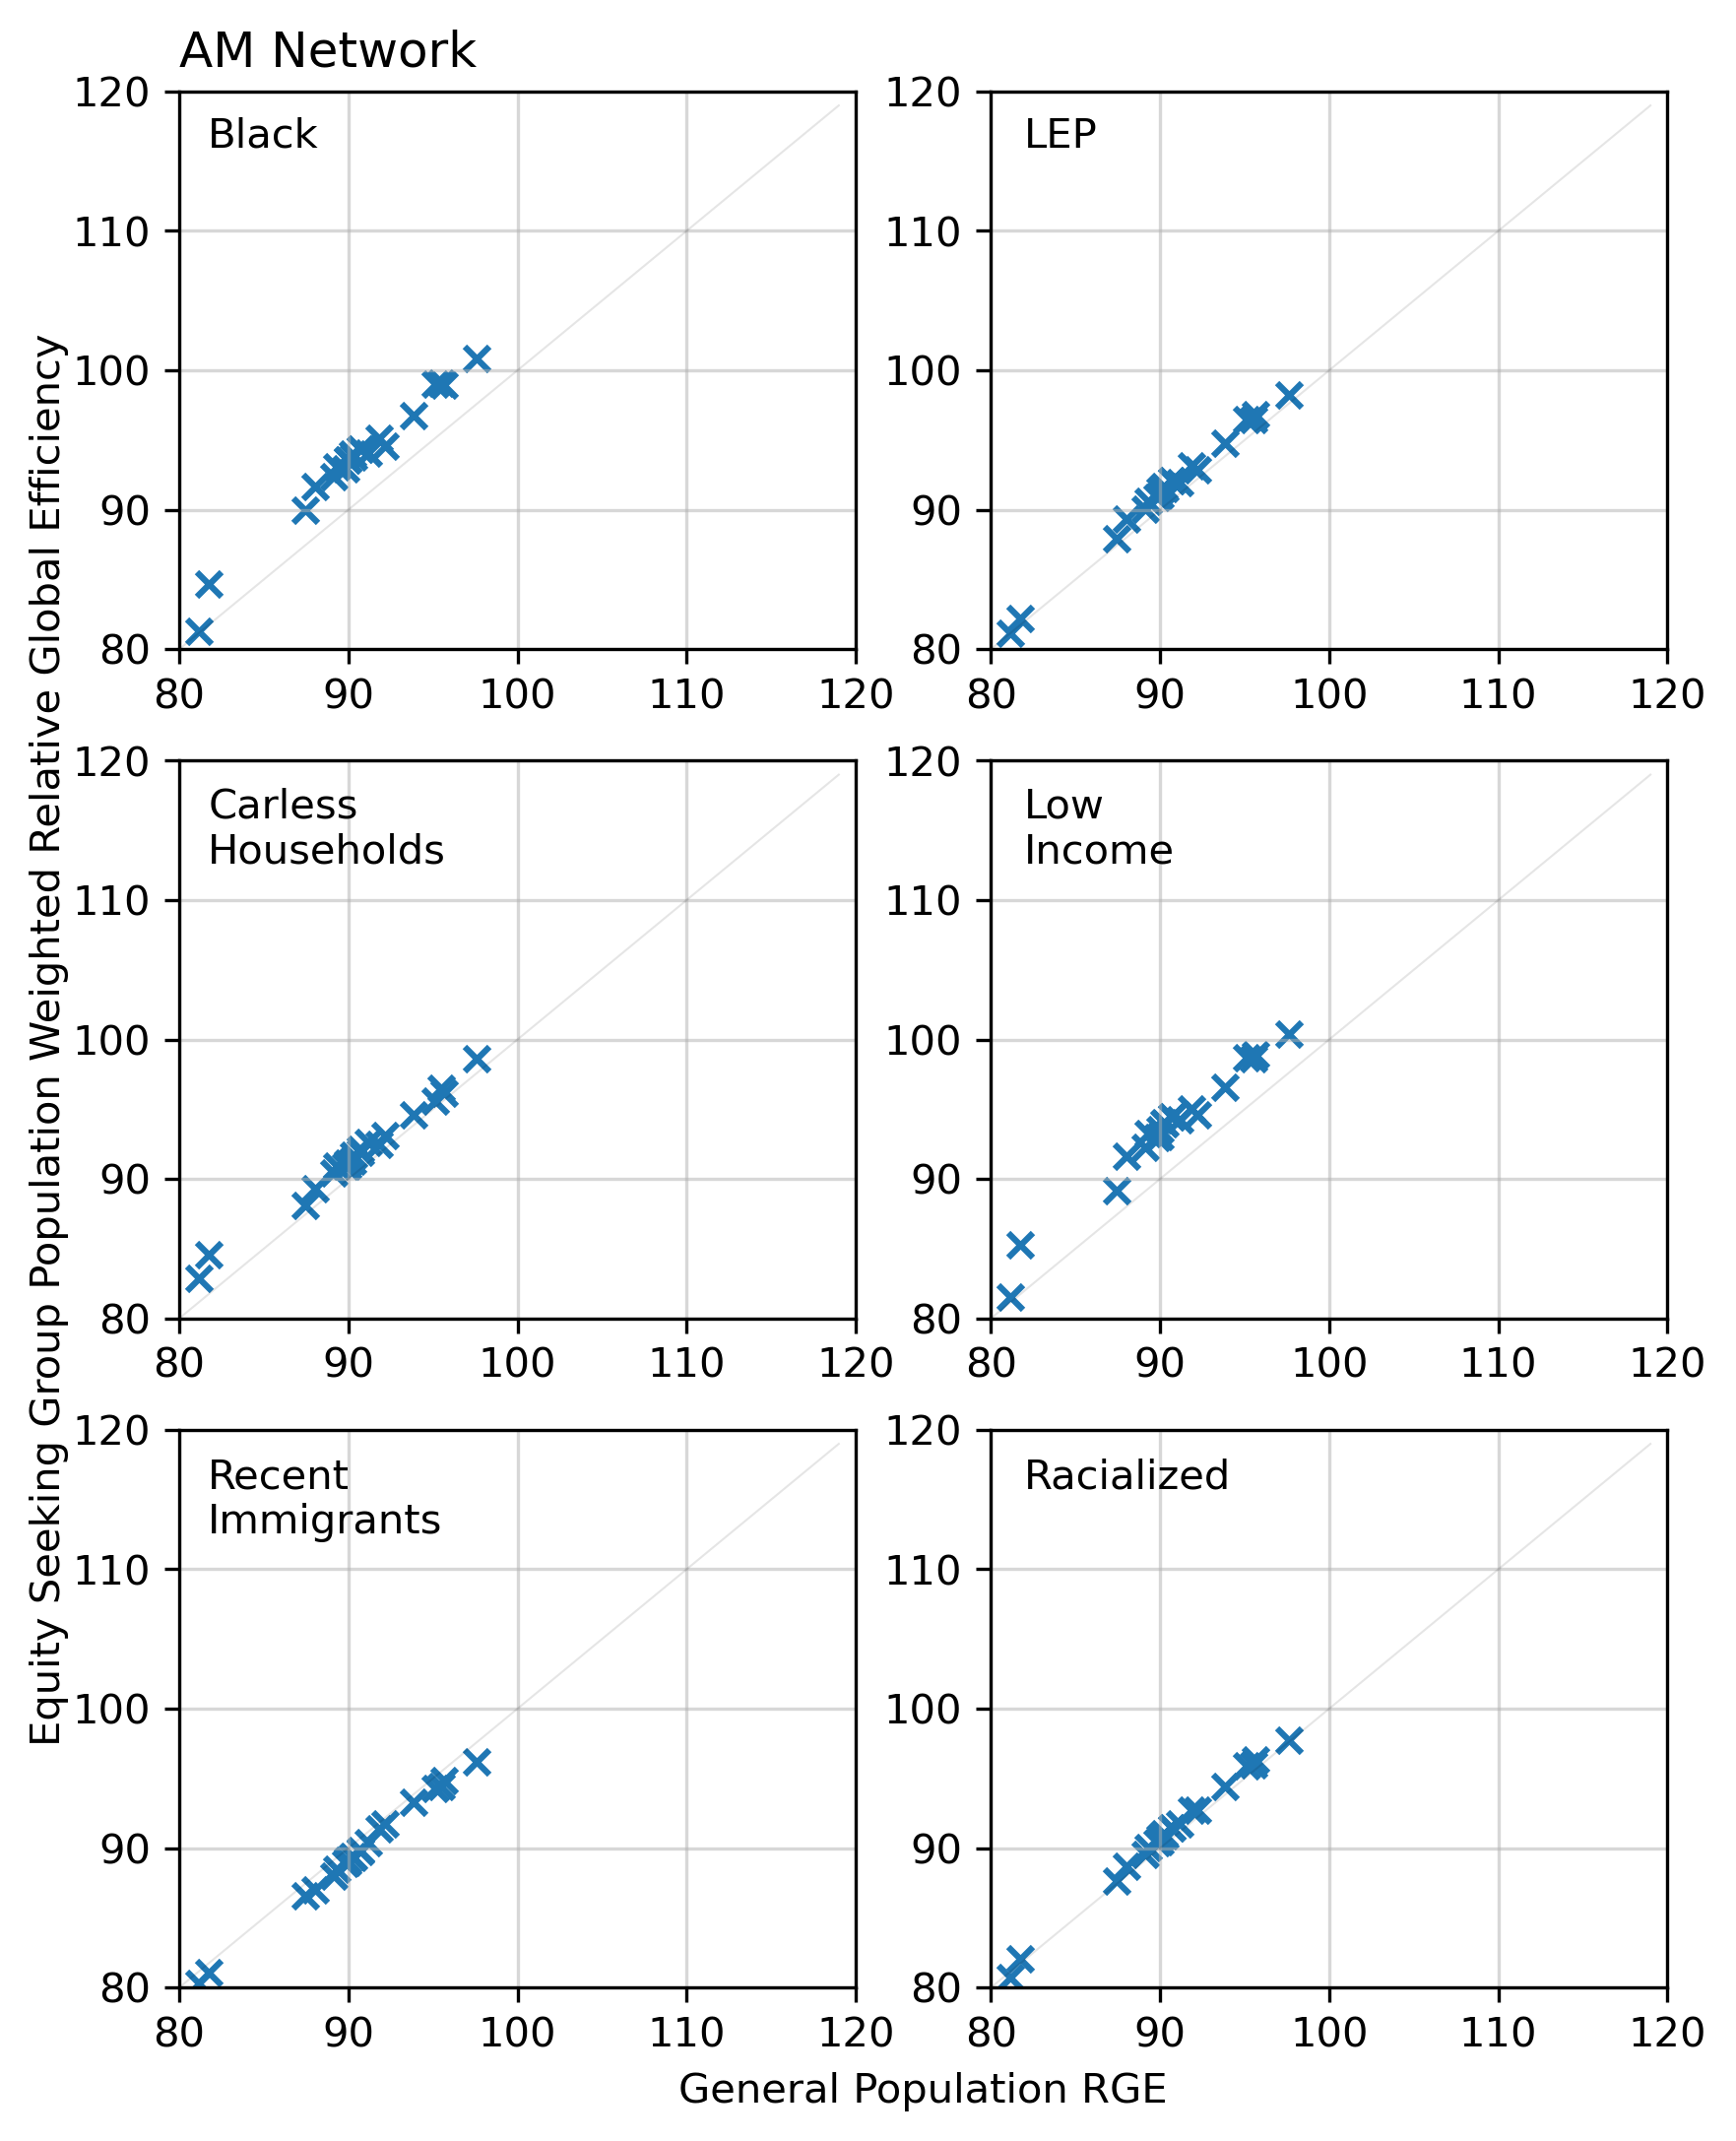

In [117]:
period = 'AM'

fig, ax = plt.subplots(3,2)
i = 0
j = 0
y_str = 0.87
x_str = 0.14

for group_code in list(df['group'].drop_duplicates()):
    if group_code == 'raw':
        continue

    raw = df[(df['period'] == period) & (df['group'] == 'raw')]
    raw = raw.rename(columns = {'rel_ge':'rel_raw_ge'})

    group = df[(df['period'] == period) & (df['group'] == group_code)]
    group = group.merge(raw[['date', 'period', 'rel_raw_ge']])
    
    if i == 3:
        i = 0
        j = 1
        y_str = 0.87
        x_str = 0.565

    ax[i,j].scatter(x = group['rel_raw_ge'], y = group['rel_ge'], marker = 'x')

    ax[i,j].plot(range(120),range(120), color = 'k', alpha = 0.1, linewidth = 0.5)
    
#     if i == 2:
#         ax[i,j].set_xlabel('General Population RGE')
        
    fig.text(s = group['Group String'].iloc[0], x = x_str, y = y_str, va = 'top')

    ax[i,j].set_xlim([80,120])
    ax[i,j].set_ylim([80,120])
    ax[i,j].grid(alpha = 0.5)
    
    
    y_str = y_str - 0.267
    
    i = i + 1
    
fig.set_size_inches(6.5,8.5)
fig.add_subplot(111, frameon=False)
plt.ylabel('Equity Seeking Group Population Weighted Relative Global Efficiency')
plt.xlabel('General Population RGE')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title(period + ' Network', ha = 'left', x = 0)

plt.savefig(period + '_RGE_equity.png', dpi = 300)

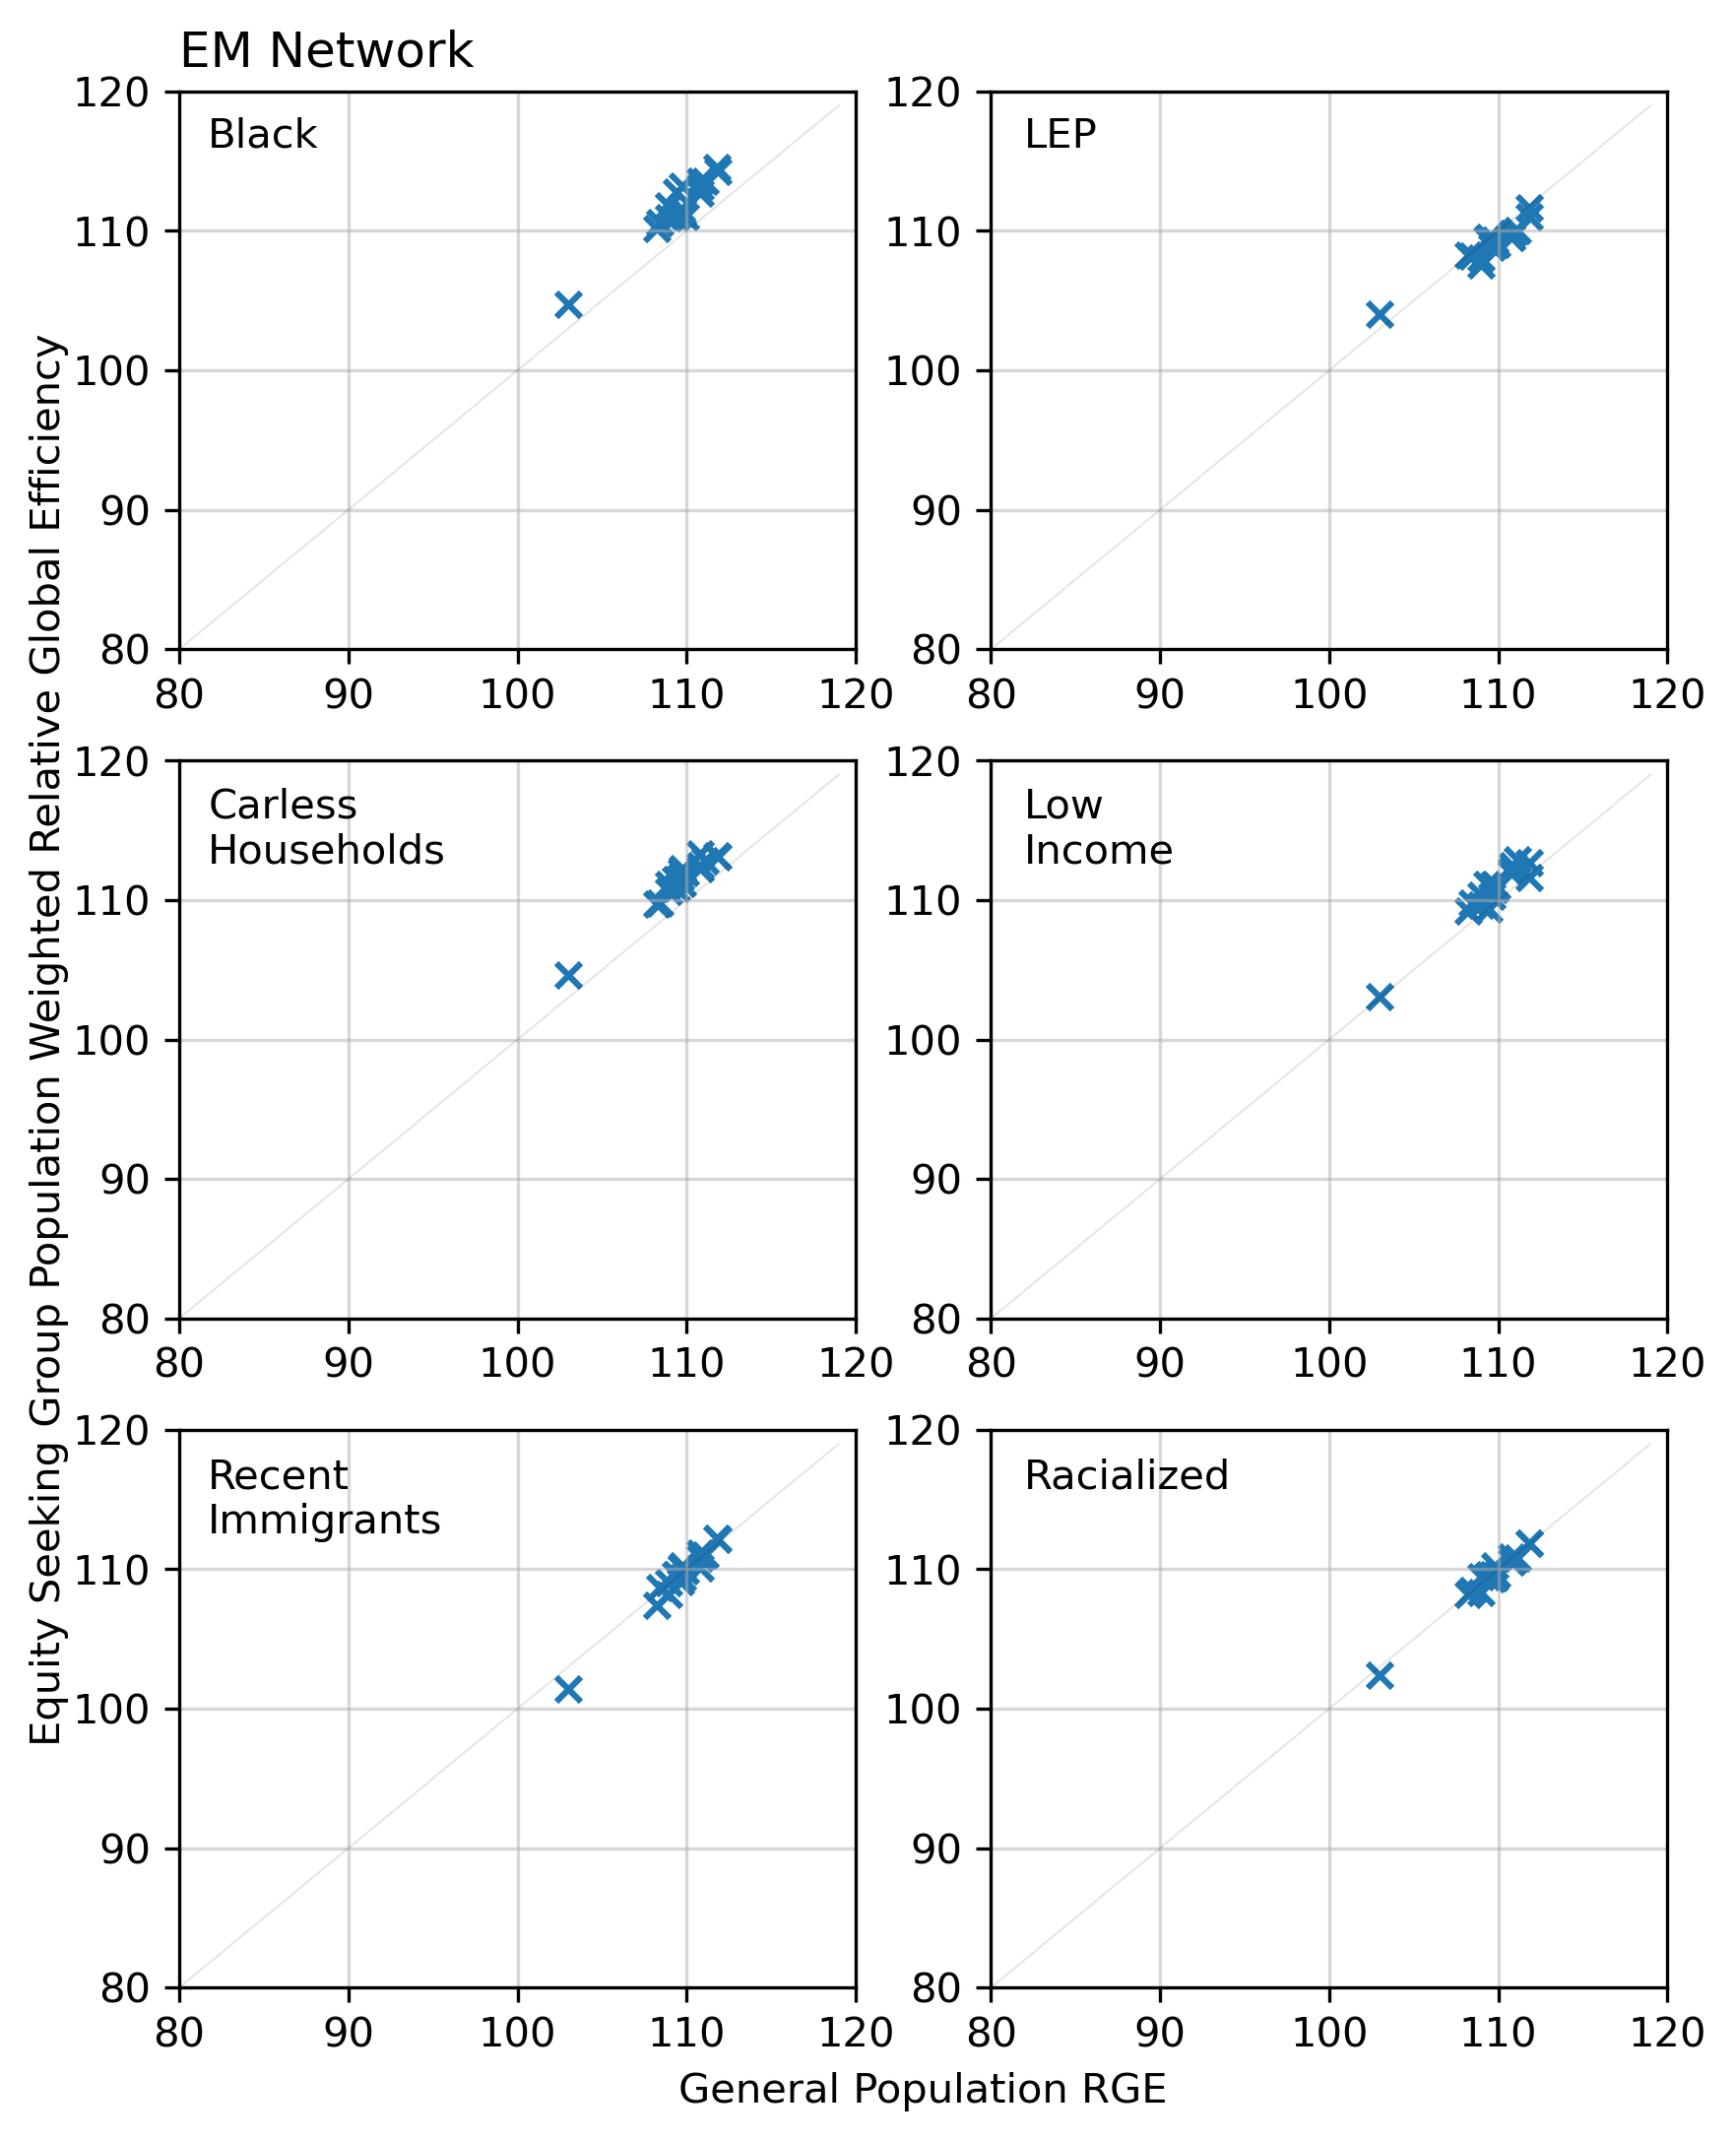

In [118]:
period = 'EM'

fig, ax = plt.subplots(3,2)
i = 0
j = 0
y_str = 0.87
x_str = 0.14

for group_code in list(df['group'].drop_duplicates()):
    if group_code == 'raw':
        continue

    raw = df[(df['period'] == period) & (df['group'] == 'raw')]
    raw = raw.rename(columns = {'rel_ge':'rel_raw_ge'})

    group = df[(df['period'] == period) & (df['group'] == group_code)]
    group = group.merge(raw[['date', 'period', 'rel_raw_ge']])
    
    if i == 3:
        i = 0
        j = 1
        y_str = 0.87
        x_str = 0.565

    ax[i,j].scatter(x = group['rel_raw_ge'], y = group['rel_ge'], marker = 'x')

    ax[i,j].plot(range(120),range(120), color = 'k', alpha = 0.1, linewidth = 0.5)
    
#     if i == 2:
#         ax[i,j].set_xlabel('General Population RGE')
        
    fig.text(s = group['Group String'].iloc[0], x = x_str, y = y_str, va = 'top')

    ax[i,j].set_xlim([80,120])
    ax[i,j].set_ylim([80,120])
    ax[i,j].grid(alpha = 0.5)
    
    
    y_str = y_str - 0.267
    
    i = i + 1
    
fig.set_size_inches(6.5,8.5)
fig.add_subplot(111, frameon=False)
plt.ylabel('Equity Seeking Group Population Weighted Relative Global Efficiency')
plt.xlabel('General Population RGE')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title(period + ' Network', ha = 'left', x = 0)

plt.savefig(period + '_RGE_equity.png', dpi = 300)

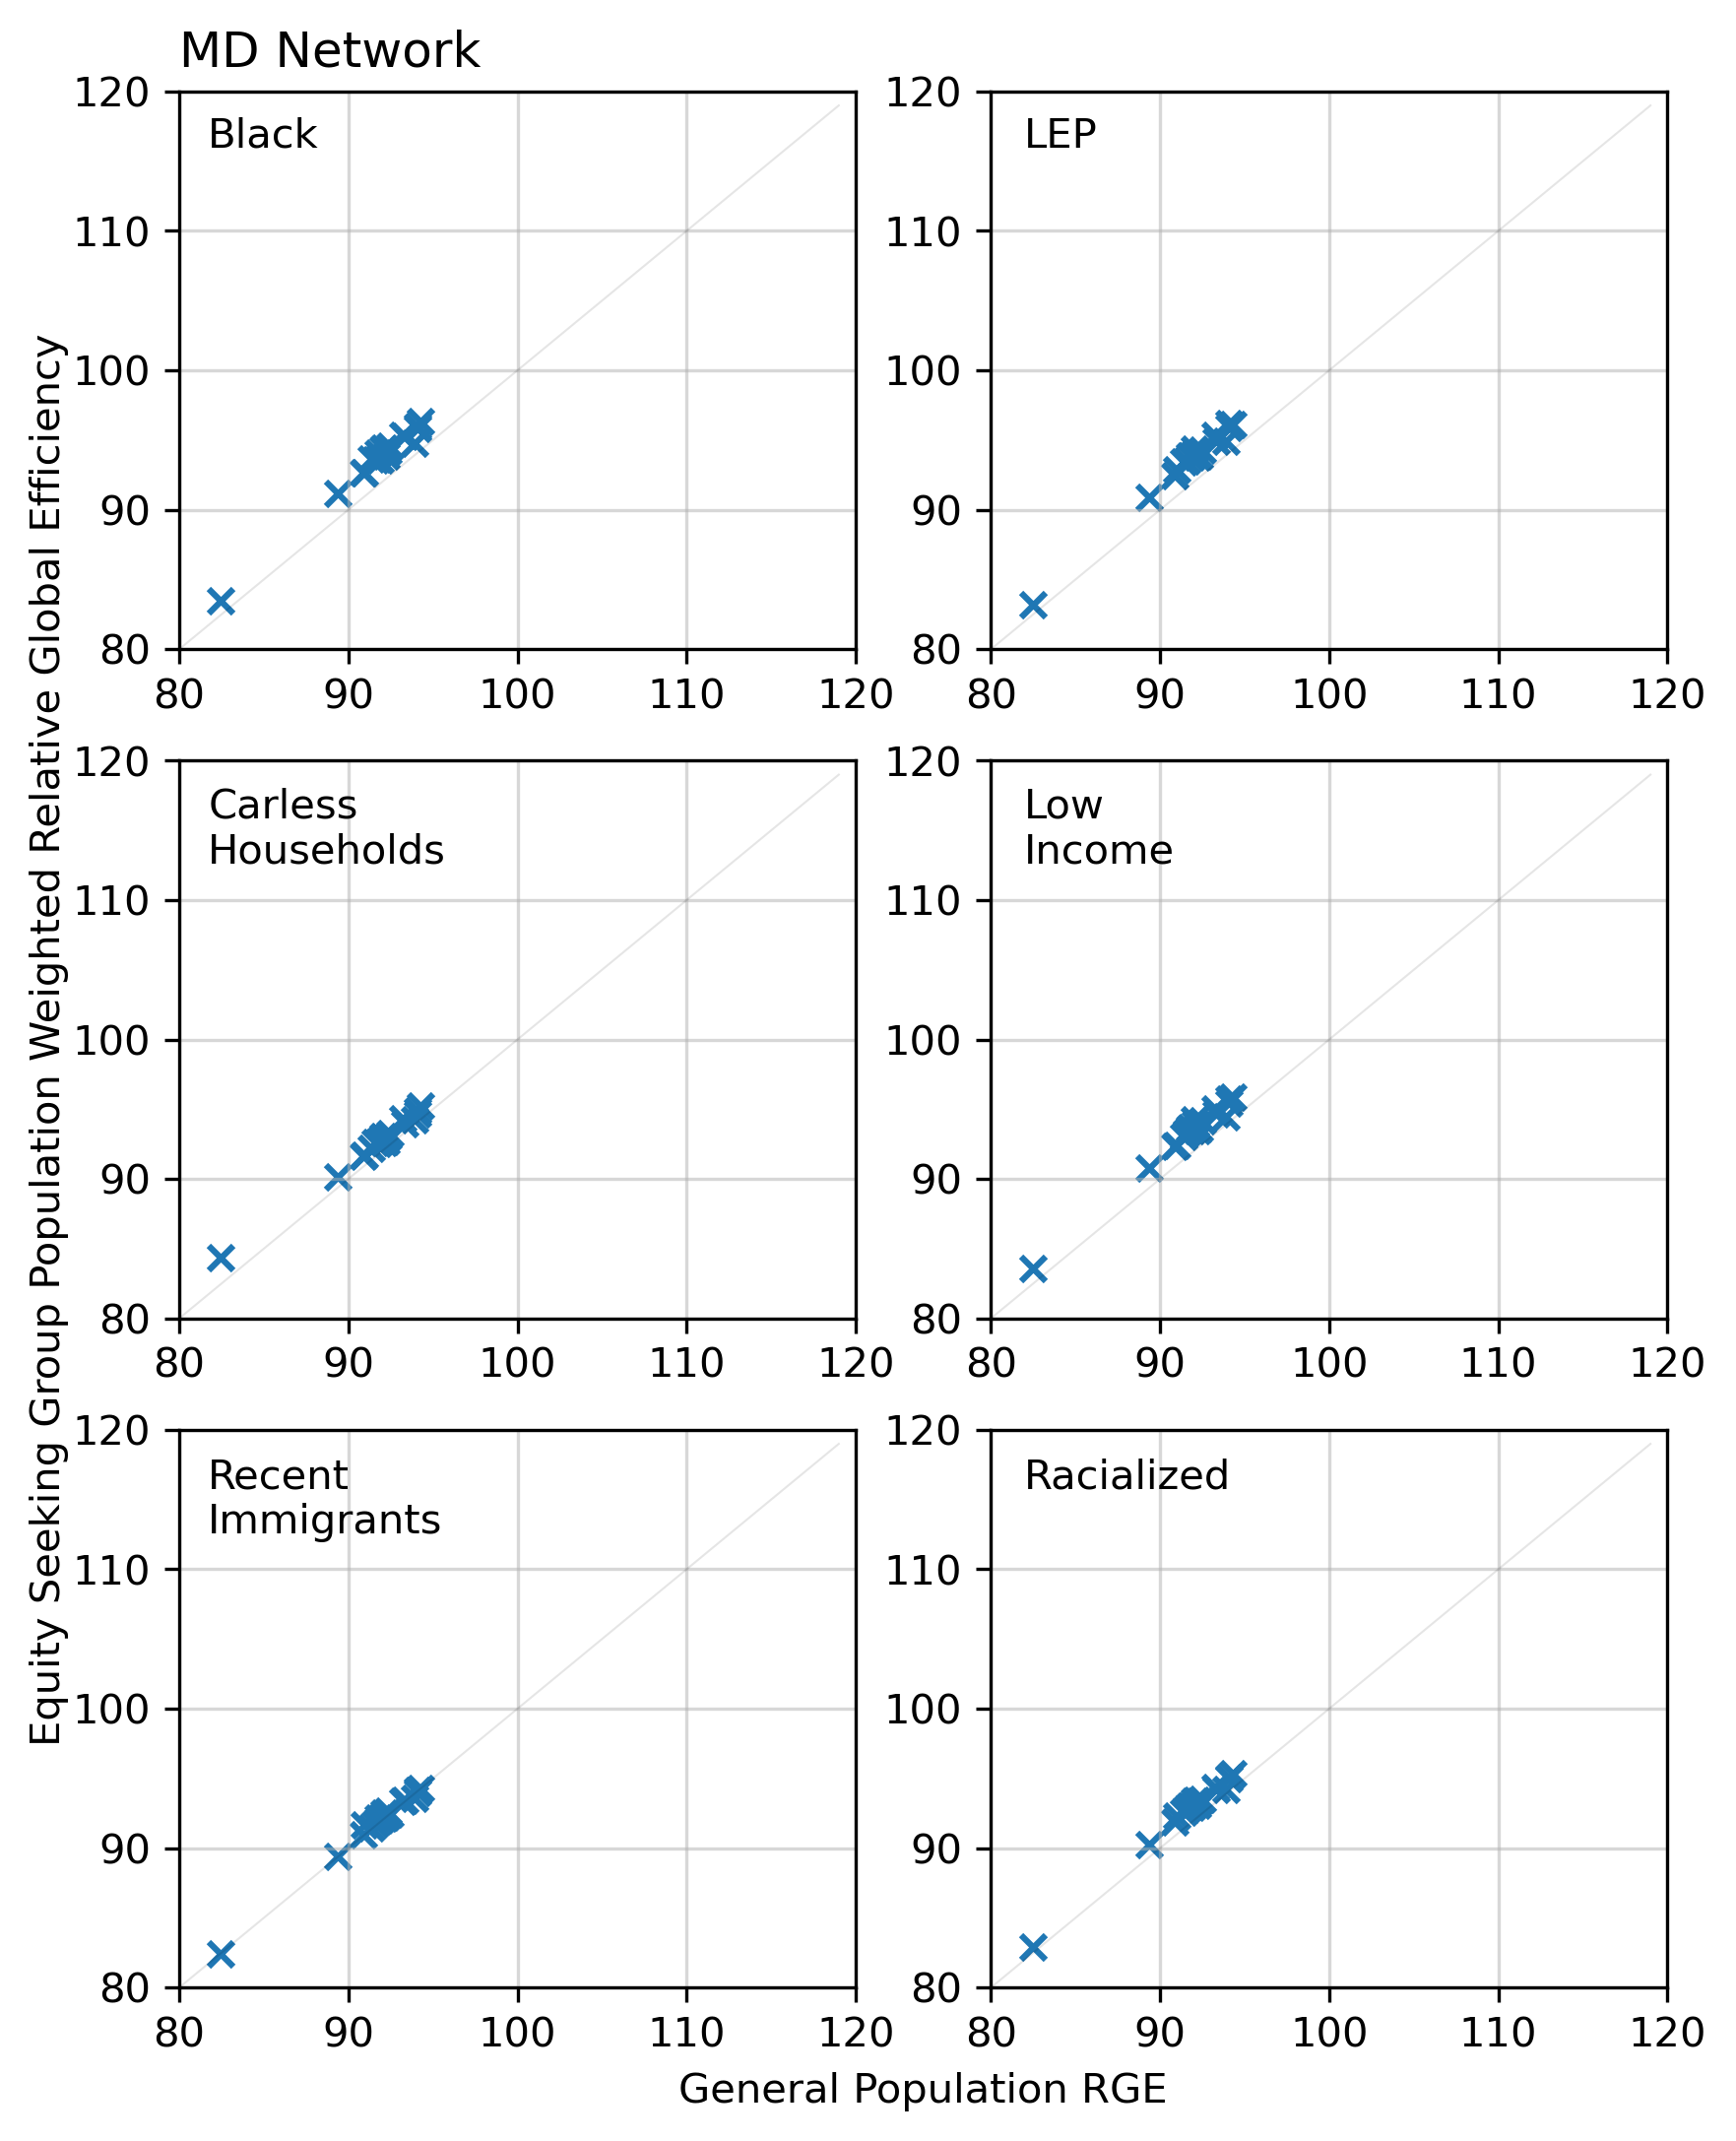

In [119]:
period = 'MD'

fig, ax = plt.subplots(3,2)
i = 0
j = 0
y_str = 0.87
x_str = 0.14

for group_code in list(df['group'].drop_duplicates()):
    if group_code == 'raw':
        continue

    raw = df[(df['period'] == period) & (df['group'] == 'raw')]
    raw = raw.rename(columns = {'rel_ge':'rel_raw_ge'})

    group = df[(df['period'] == period) & (df['group'] == group_code)]
    group = group.merge(raw[['date', 'period', 'rel_raw_ge']])
    
    if i == 3:
        i = 0
        j = 1
        y_str = 0.87
        x_str = 0.565

    ax[i,j].scatter(x = group['rel_raw_ge'], y = group['rel_ge'], marker = 'x')

    ax[i,j].plot(range(120),range(120), color = 'k', alpha = 0.1, linewidth = 0.5)
    
#     if i == 2:
#         ax[i,j].set_xlabel('General Population RGE')
        
    fig.text(s = group['Group String'].iloc[0], x = x_str, y = y_str, va = 'top')

    ax[i,j].set_xlim([80,120])
    ax[i,j].set_ylim([80,120])
    ax[i,j].grid(alpha = 0.5)
    
    
    y_str = y_str - 0.267
    
    i = i + 1
    
fig.set_size_inches(6.5,8.5)
fig.add_subplot(111, frameon=False)
plt.ylabel('Equity Seeking Group Population Weighted Relative Global Efficiency')
plt.xlabel('General Population RGE')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title(period + ' Network', ha = 'left', x = 0)

plt.savefig(period + '_RGE_equity.png', dpi = 300)

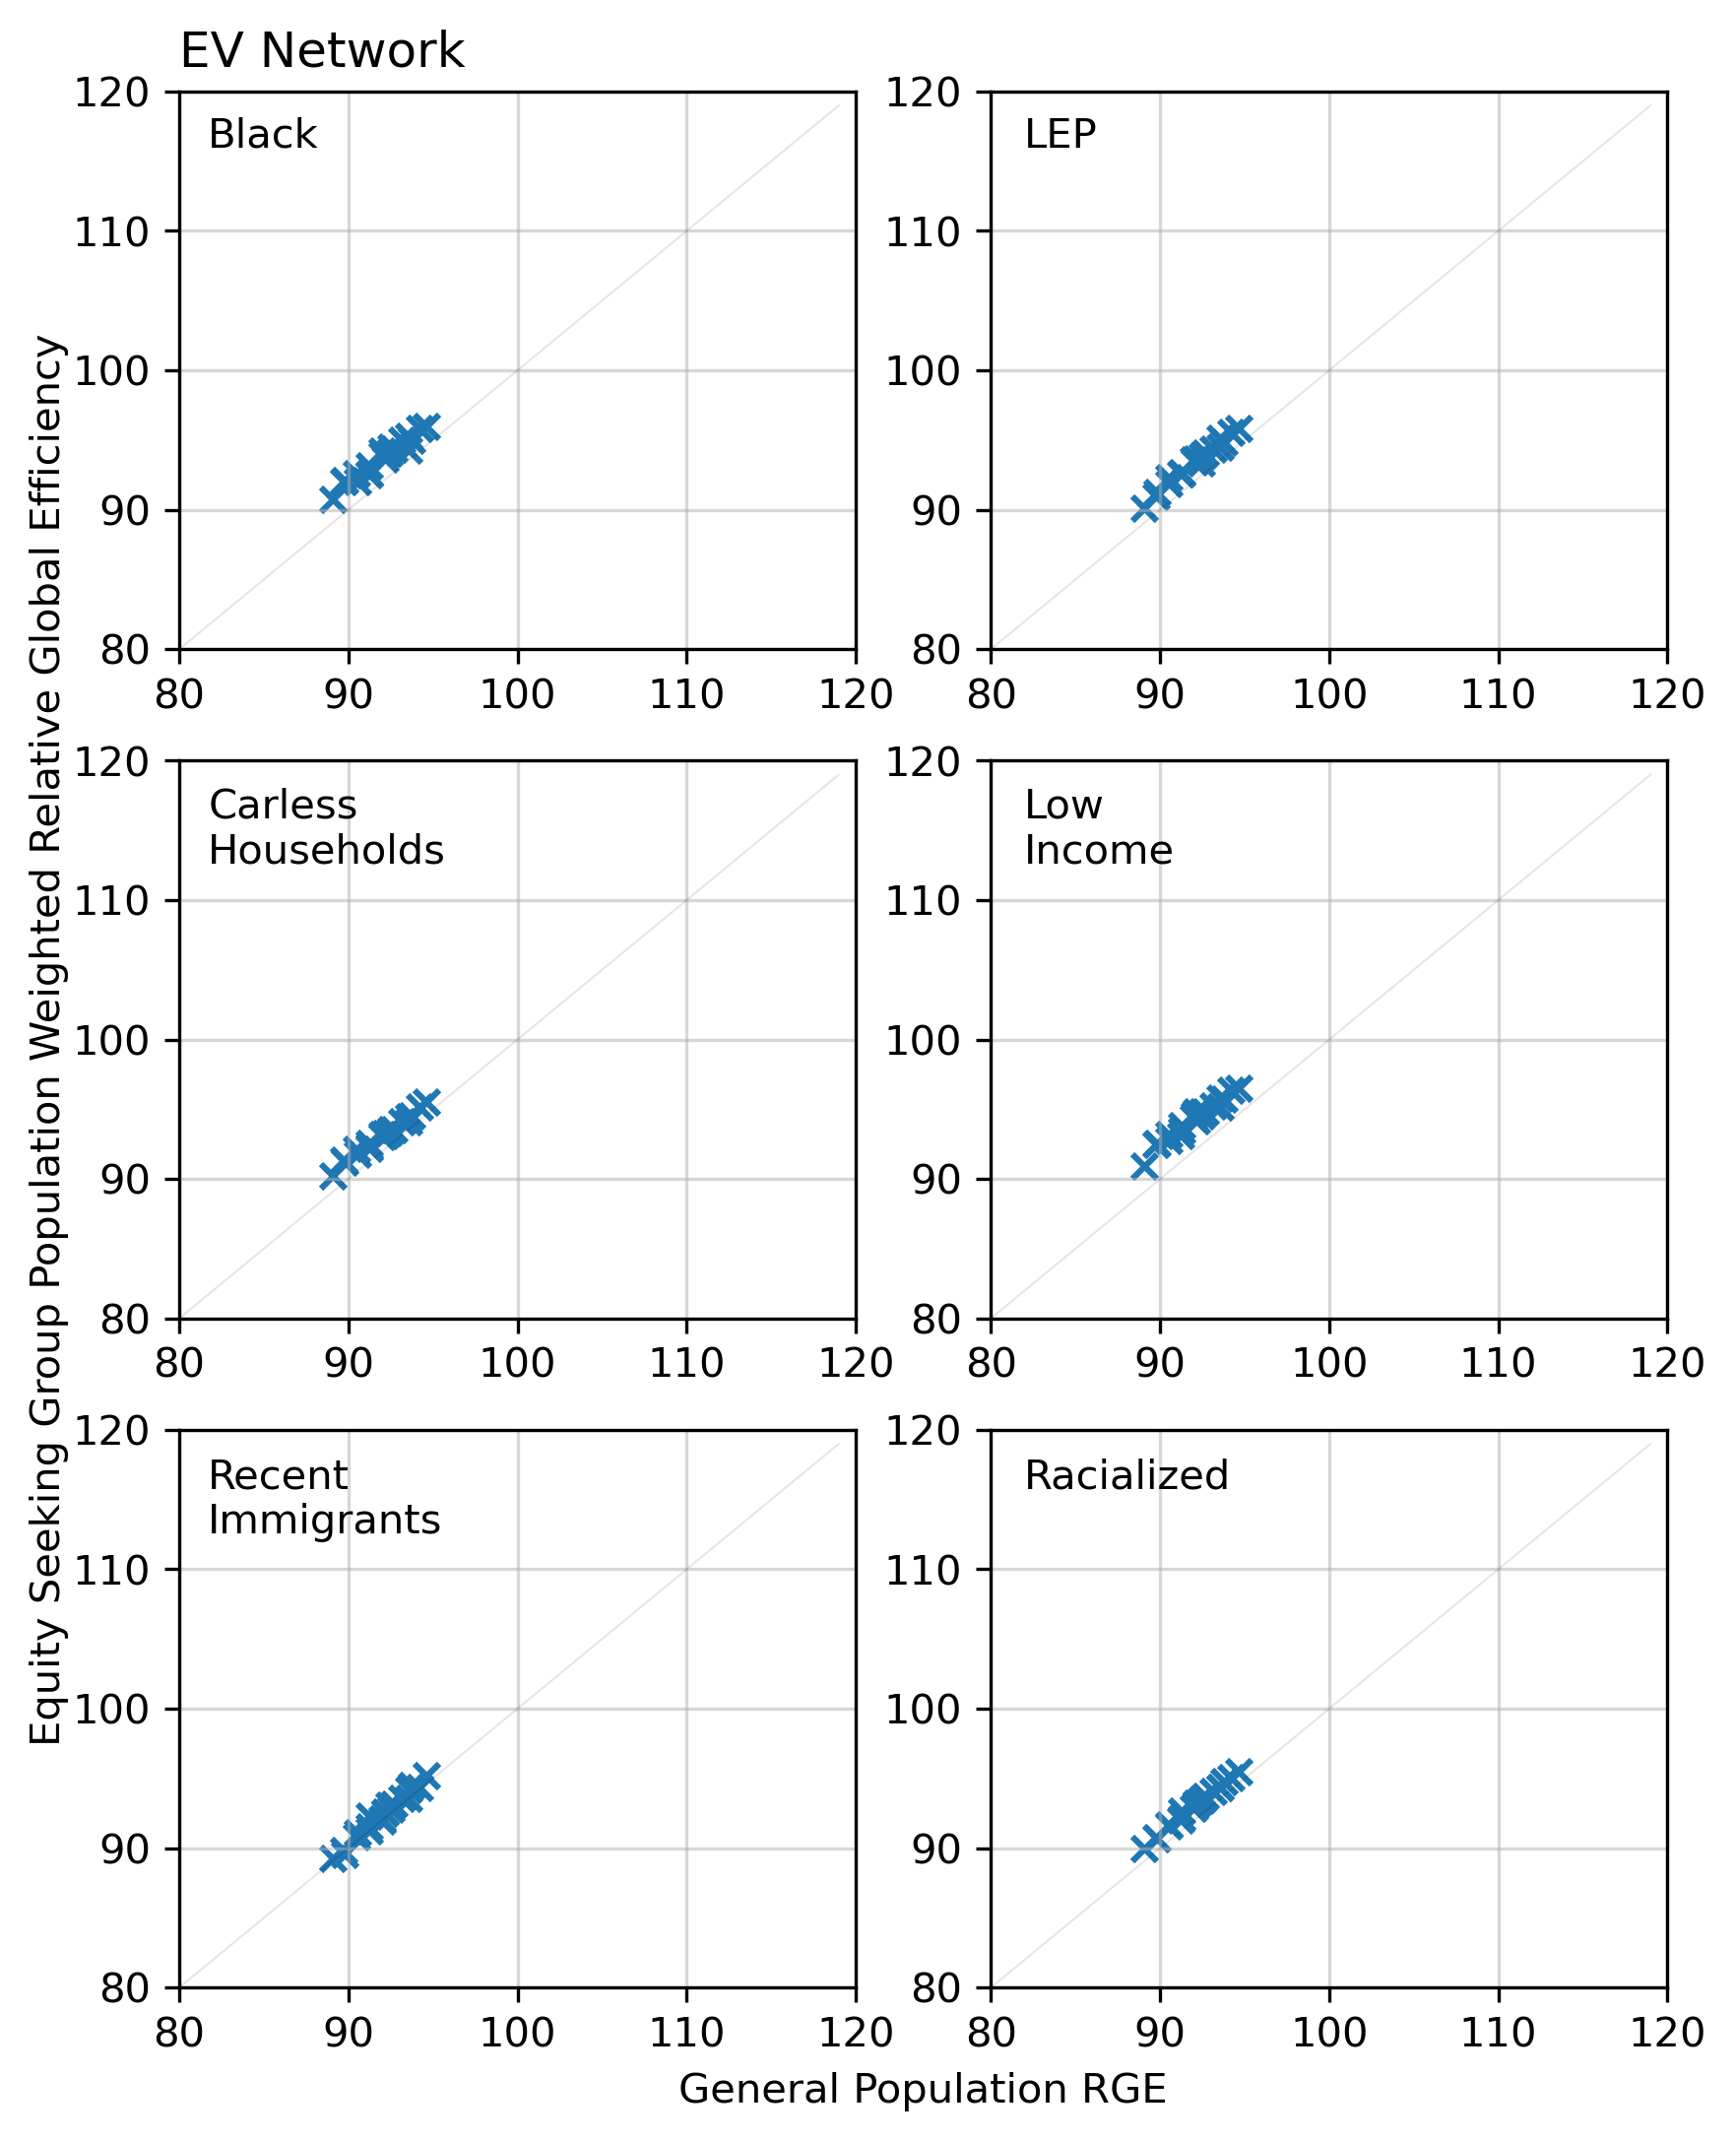

In [120]:
period = 'EV'

fig, ax = plt.subplots(3,2)
i = 0
j = 0
y_str = 0.87
x_str = 0.14

for group_code in list(df['group'].drop_duplicates()):
    if group_code == 'raw':
        continue

    raw = df[(df['period'] == period) & (df['group'] == 'raw')]
    raw = raw.rename(columns = {'rel_ge':'rel_raw_ge'})

    group = df[(df['period'] == period) & (df['group'] == group_code)]
    group = group.merge(raw[['date', 'period', 'rel_raw_ge']])
    
    if i == 3:
        i = 0
        j = 1
        y_str = 0.87
        x_str = 0.565

    ax[i,j].scatter(x = group['rel_raw_ge'], y = group['rel_ge'], marker = 'x')

    ax[i,j].plot(range(120),range(120), color = 'k', alpha = 0.1, linewidth = 0.5)
    
#     if i == 2:
#         ax[i,j].set_xlabel('General Population RGE')
        
    fig.text(s = group['Group String'].iloc[0], x = x_str, y = y_str, va = 'top')

    ax[i,j].set_xlim([80,120])
    ax[i,j].set_ylim([80,120])
    ax[i,j].grid(alpha = 0.5)
    
    
    y_str = y_str - 0.267
    
    i = i + 1
    
fig.set_size_inches(6.5,8.5)
fig.add_subplot(111, frameon=False)
plt.ylabel('Equity Seeking Group Population Weighted Relative Global Efficiency')
plt.xlabel('General Population RGE')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title(period + ' Network', ha = 'left', x = 0)

plt.savefig(period + '_RGE_equity.png', dpi = 300)

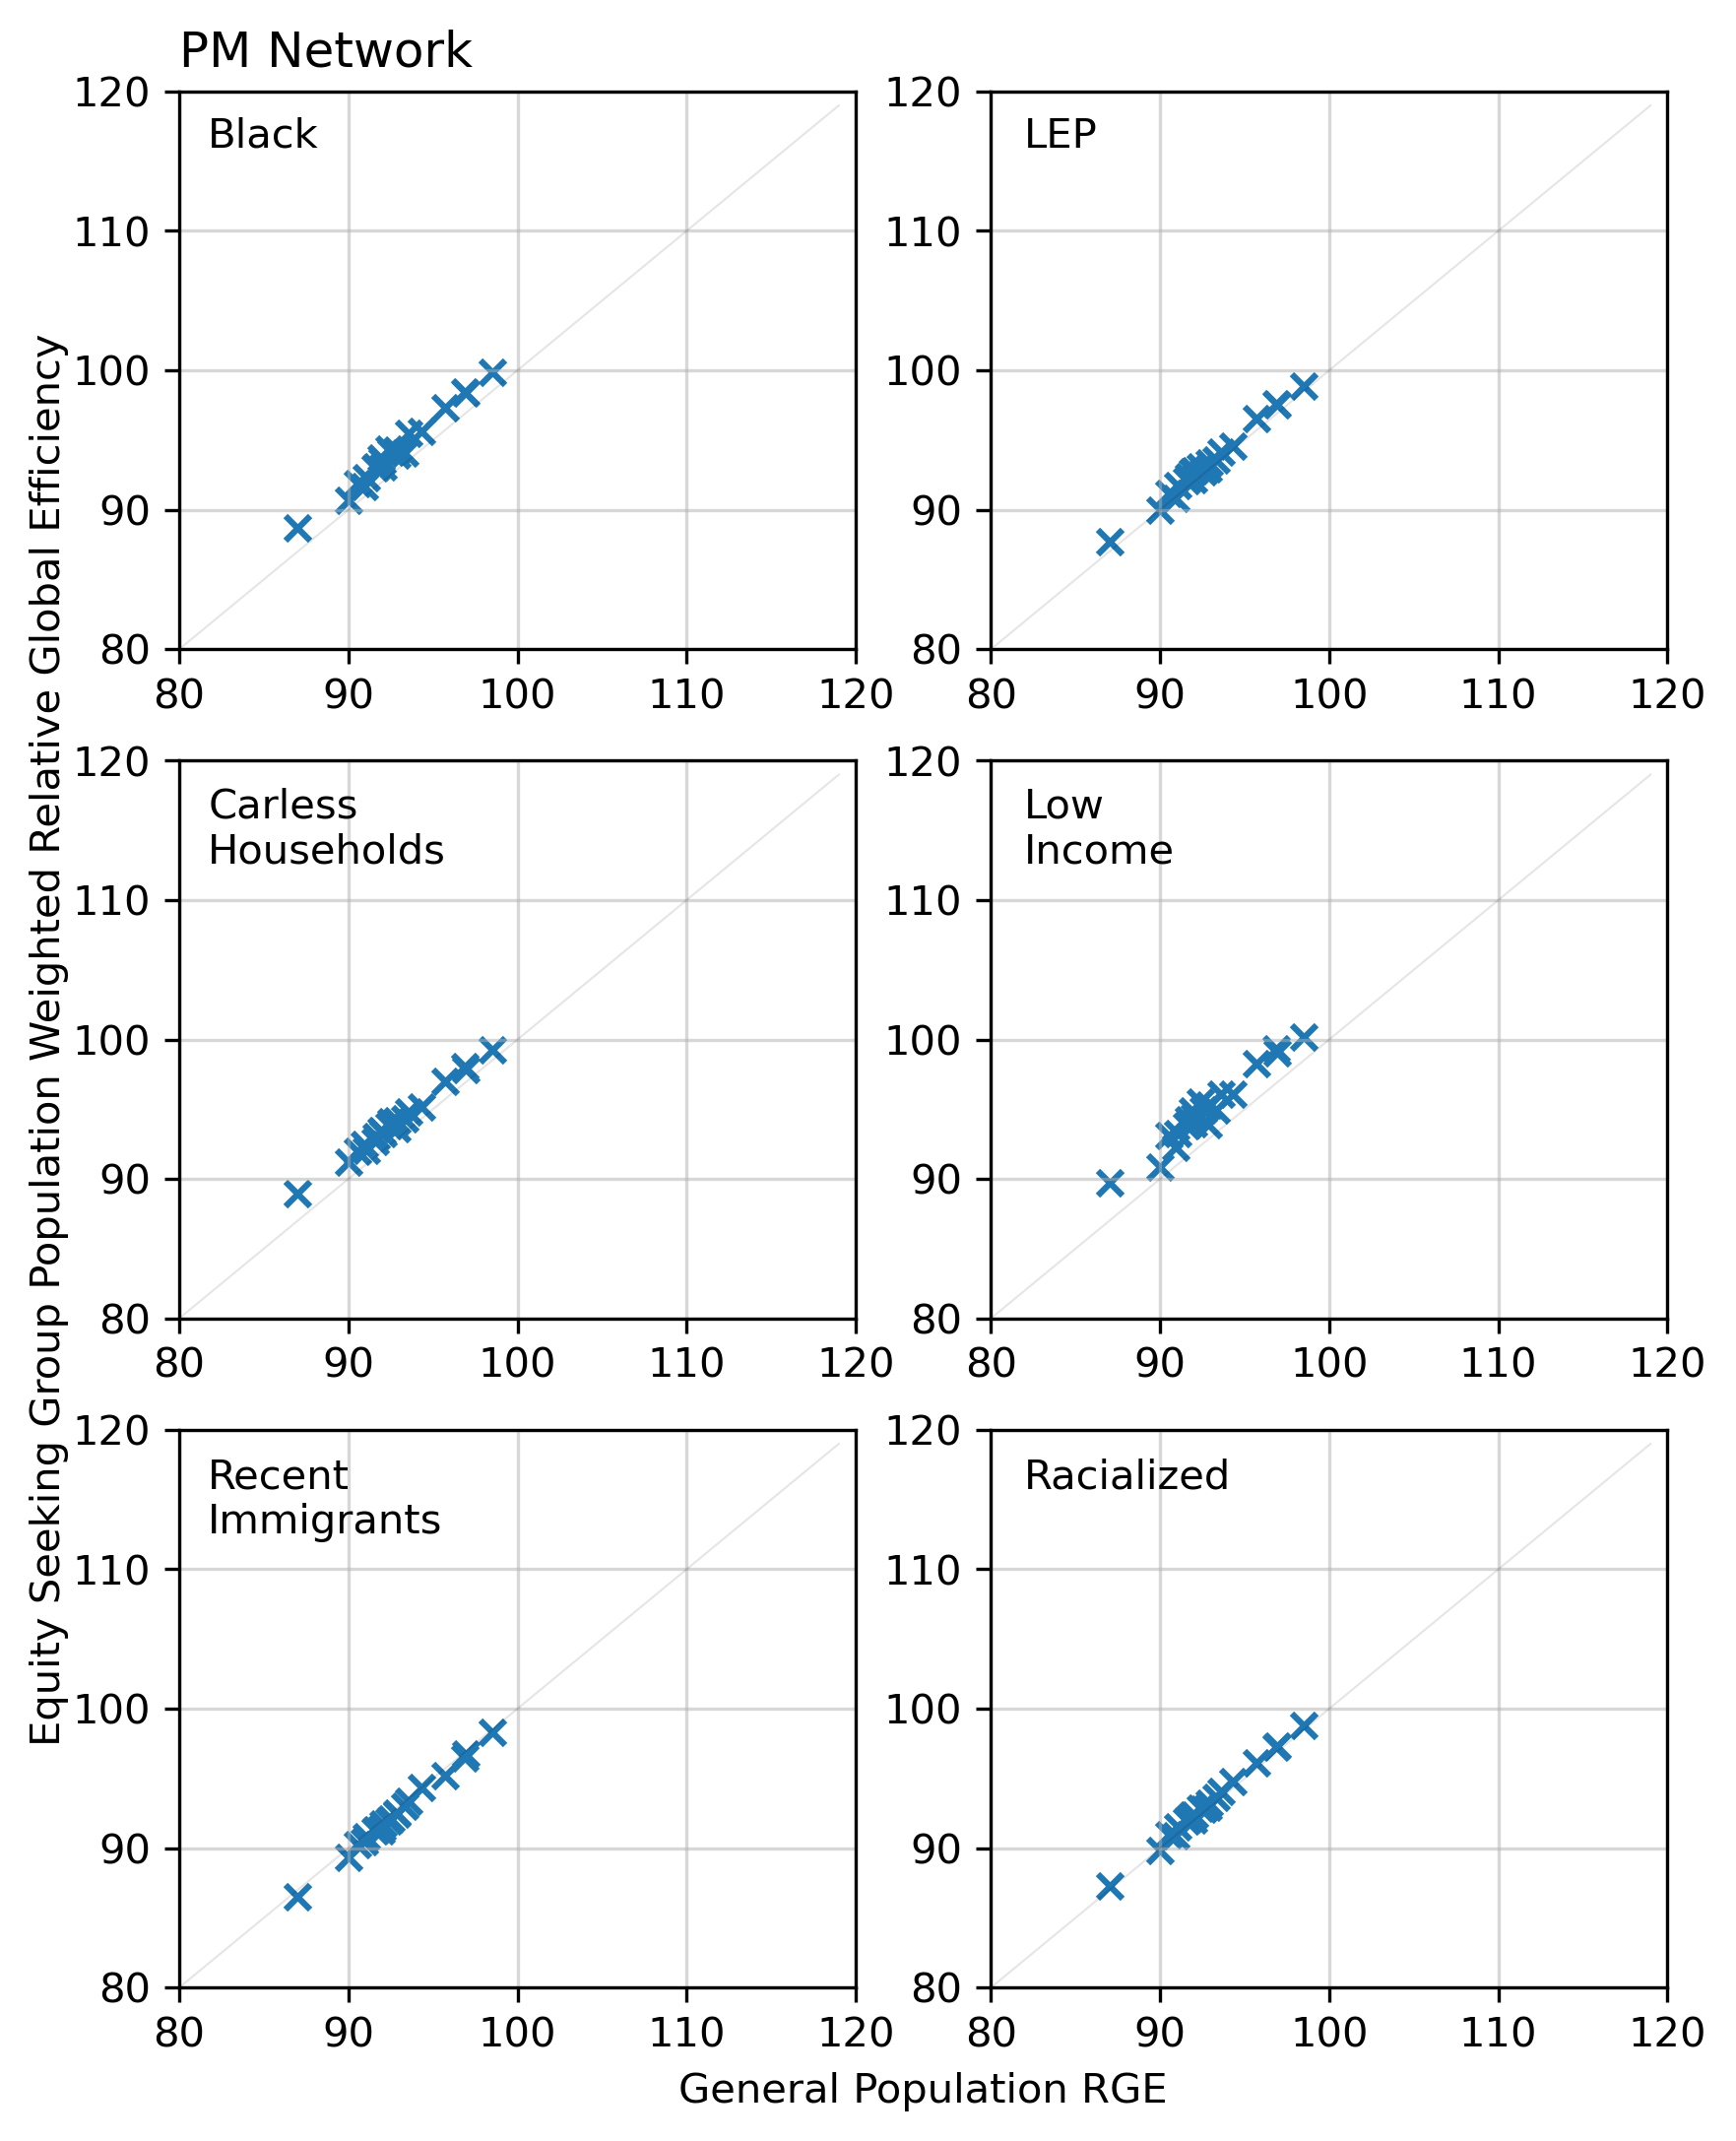

In [121]:
period = 'PM'

fig, ax = plt.subplots(3,2)
i = 0
j = 0
y_str = 0.87
x_str = 0.14

for group_code in list(df['group'].drop_duplicates()):
    if group_code == 'raw':
        continue

    raw = df[(df['period'] == period) & (df['group'] == 'raw')]
    raw = raw.rename(columns = {'rel_ge':'rel_raw_ge'})

    group = df[(df['period'] == period) & (df['group'] == group_code)]
    group = group.merge(raw[['date', 'period', 'rel_raw_ge']])
    
    if i == 3:
        i = 0
        j = 1
        y_str = 0.87
        x_str = 0.565

    ax[i,j].scatter(x = group['rel_raw_ge'], y = group['rel_ge'], marker = 'x')

    ax[i,j].plot(range(120),range(120), color = 'k', alpha = 0.1, linewidth = 0.5)
    
#     if i == 2:
#         ax[i,j].set_xlabel('General Population RGE')
        
    fig.text(s = group['Group String'].iloc[0], x = x_str, y = y_str, va = 'top')

    ax[i,j].set_xlim([80,120])
    ax[i,j].set_ylim([80,120])
    ax[i,j].grid(alpha = 0.5)
    
    
    y_str = y_str - 0.267
    
    i = i + 1
    
fig.set_size_inches(6.5,8.5)
fig.add_subplot(111, frameon=False)
plt.ylabel('Equity Seeking Group Population Weighted Relative Global Efficiency')
plt.xlabel('General Population RGE')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title(period + ' Network', ha = 'left', x = 0)

plt.savefig(period + '_RGE_equity.png', dpi = 300)